<a href="https://colab.research.google.com/github/DenisGom2022/InteligenciaArtificial/blob/main/18.%20Caso%20Pr%C3%A1ctico%3A%20Intuiciones%20sobre%20End-to-End%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso práctico: Clasificación de imágenes

# 1. Conjunto de datos

In [1]:
from tensorflow.keras import datasets

In [2]:
fashion_mnist = datasets.fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# 2. Visualización del conjunto de datos

<function matplotlib.pyplot.show(close=None, block=None)>

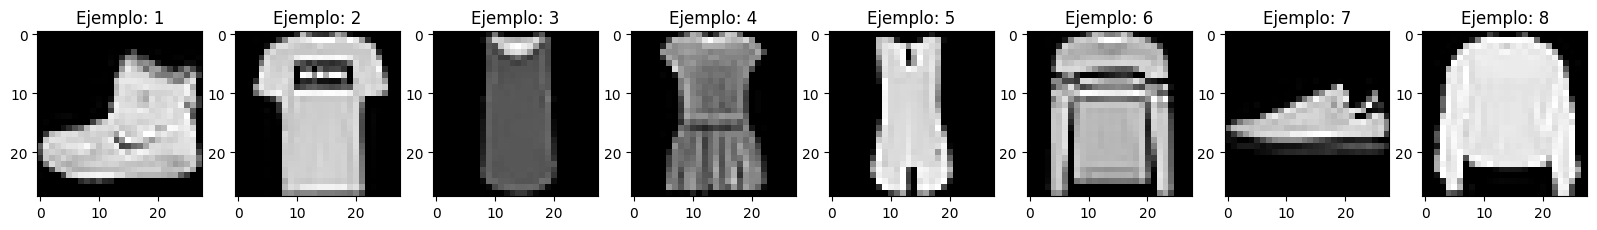

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
cantidad = 8

for index, img in zip(range(1, cantidad + 1), X_train[:cantidad]):
  plt.subplot(1, cantidad, index)
  plt.imshow(img, cmap=plt.cm.gray)
  plt.title("Ejemplo: " + str(index))
plt.show

In [12]:
print("longitud subconjunto de entrenamiento: ", len(X_train))
print("longitud subconjunto de prueba: ", len(X_test))

longitud subconjunto de entrenamiento:  60000
longitud subconjunto de prueba:  10000


# 3. Transformación del conjunto de datos

In [13]:
X_train_prep = X_train.reshape((60000, 28*28))
X_test_prep = X_test.reshape((10000, 28*28))

In [14]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer()
X_train_prep = transformer.fit_transform(X_train_prep)
X_test_prep = transformer.transform(X_test_prep)

In [15]:
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)

# 4. Construcción del modelo

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision'])

In [18]:
history = network.fit(X_train_prep, y_train_prep, epochs=15, batch_size=32, validation_data=(X_test_prep, y_test_prep))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - Precision: 0.8484 - accuracy: 0.7611 - loss: 0.6959 - val_Precision: 0.8794 - val_accuracy: 0.8470 - val_loss: 0.4282
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - Precision: 0.8892 - accuracy: 0.8613 - loss: 0.3811 - val_Precision: 0.8864 - val_accuracy: 0.8622 - val_loss: 0.3826
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - Precision: 0.8988 - accuracy: 0.8763 - loss: 0.3323 - val_Precision: 0.8848 - val_accuracy: 0.8623 - val_loss: 0.3730
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - Precision: 0.9079 - accuracy: 0.8855 - loss: 0.3082 - val_Precision: 0.8965 - val_accuracy: 0.8740 - val_loss: 0.3521
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - Precision: 0.9122 - accuracy: 0.8917 - loss: 0.2877 - val_Precision: 0.8860 - val_accuracy: 0.8688 - val_loss: 0.3617
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - Precision: 0.9169 - accuracy: 0.8989 - loss: 0.2699 - val_Precision: 0.